# PROJECT-2. Анализ воронки


8.3. PROJECT. Описание задач проекта

ЗАДАЧИ (ФОРМАЛИЗОВАННЫЕ)

1. Проверить, отличается ли время прохождения различных этапов для пользователей, которые прошли обучение, от пользователей, не начинавших обучение. Насколько обучение сокращает время прохождения этапов?

2. Посмотреть, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь. Нужно доказать, что успешное обучение само по себе влияет на оплату, и без разницы, каким этапом оно шло.

3. Дополнительная задача. Как часто пользователи начинают обучение после того, как они выбрали уровень сложности? Это позволит нам понять, насколько прозрачен процесс взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.

### Проверку производим на основе данных пользователей, которые зарегистрировались в 2018 году (с 1 января по 31 декабря 2018 года включительно).


! ЗАМЕТКА :

В данном документе для удобства и лучшего визуального восприятия используется номерная разметка и текст формата Markdown ("не запущенный код" текста)

Для удобства проверки задач 1, 2, 3 проекта можно перейти к следующим разделам по номерной разметке, соответственно: 
# 1.4 - Вывод 1
# 2.6 - Вывод 2
# 3.4 - Вывод 3

В качестве дополнительного анализа был добавлен анализ пользовательских событий и уникальных пользовательских путей пользователей (для лучшего восприятия и ориентирования используется номерная разметка: #-#####).

## СБОР И ОБРАБОТКА ДАННЫХ

In [1]:
# Импортируем необходимые датасеты '7_4_Events', '7_4_Purchase' :

import pandas as pd
events_df = pd.read_csv('7_4_events.csv')
display(events_df)

purchase_df = pd.read_csv('7_4_Purchase.csv')
display(purchase_df)

,id,event_type,selected_level,start_time,tutorial_id,user_id
0,28903,registration,NaN,2016-05-11T23:40:55,NaN,12583
1,28904,registration,NaN,2016-05-11T23:49:58,NaN,12584
2,28905,registration,NaN,2016-05-12T00:53:07,NaN,12585
3,28906,tutorial_start,NaN,2016-05-12T01:32:20,17562.0,12585
4,28907,tutorial_finish,NaN,2016-05-12T01:34:53,17562.0,12585
...,...,...,...,...,...,...
252329,281232,level_choice,hard,2020-07-02T10:02:15,NaN,87439
252330,281233,level_choice,medium,2020-07-02T11:38:52,NaN,87488
252331,281234,pack_choice,NaN,2020-07-02T11:42:14,NaN,87488
252332,281235,tutorial_start,NaN,2020-07-02T13:32:58,86127.0,87464


,id,user_id,event_datetime,amount
0,15674,12584,2016-05-12T10:34:16,100
1,15675,12985,2016-05-13T08:25:56,50
2,15676,12828,2016-05-13T16:33:46,50
3,15677,12598,2016-05-14T01:09:37,150
4,15678,13037,2016-05-14T01:24:46,100
...,...,...,...,...
5951,21625,87331,2020-07-06T09:02:07,50
5952,21626,87418,2020-07-06T14:16:37,100
5953,21627,87431,2020-07-06T22:48:59,50
5954,21628,87363,2020-07-07T05:38:56,100


In [2]:
# Задаём условие: формируем список пользователей, зарегистрировавшихся в 2018 году

condition = (events_df.start_time >= '2018-01-01') & (events_df.start_time <= '2019-01-01') & (events_df.event_type == 'registration')
registered = events_df[condition].user_id.to_list() # список пользователей, зарегистрировавшихся в 2018 г.

# формируем список с условием registered (зарегистрированных в 2018 г.)
events = events_df[events_df.user_id.isin(registered)]
# ----- ТЕПЕРЬ БУДЕМ СЧИТАТЬ ЭТОТ датафрейм (events) ОСНОВНЫМ, нужным для дальнейшей работы ----- 
display(events)

# Теперь формируем датафрейм purchases_p с данными для пользователей, зарегистрировавшихся в 2018 году.
purchases_p = purchase_df[purchase_df.user_id.isin(registered)]
# ----- ТЕПЕРЬ БУДЕМ СЧИТАТЬ ЭТОТ датафрейм (purchases) ОСНОВНЫМ, нужным для дальнейшей работы -----
display(purchases_p)

,id,event_type,selected_level,start_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01T03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01T04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01T08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01T11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01T13:28:07,NaN,27836
...,...,...,...,...,...,...
118359,147262,tutorial_start,NaN,2019-01-01T03:26:18,49554.0,47756
118360,147263,tutorial_finish,NaN,2019-01-01T03:29:25,49554.0,47756
118362,147265,level_choice,easy,2019-01-01T05:04:52,NaN,47755
118363,147266,level_choice,medium,2019-01-01T05:42:11,NaN,47756


,id,user_id,event_datetime,amount
1171,16845,27845,2018-01-03T18:53:43,100
1172,16846,27865,2018-01-04T14:46:10,250
1174,16848,27911,2018-01-07T08:19:12,50
1175,16849,27910,2018-01-07T12:11:34,100
1176,16850,27940,2018-01-07T13:16:41,200
...,...,...,...,...
2767,18441,47498,2019-01-02T03:48:19,100
2768,18442,47647,2019-01-02T23:26:26,150
2769,18443,47554,2019-01-03T00:36:36,50
2774,18448,47742,2019-01-04T12:51:41,50


Добавим в датафрейм
### purchases_p
столбец 
##### event_type
, который будет содержать одно значение 
##### purchase.
Это нужно, чтобы в объединённом датафрейме однозначно выделить события оплаты.

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# после добавления столбца event_type, содержащего значение purchase:
purchases_p['event_type'] = 'purchase'
purchases_p

,id,user_id,event_datetime,amount,event_type
1171,16845,27845,2018-01-03T18:53:43,100,purchase
1172,16846,27865,2018-01-04T14:46:10,250,purchase
1174,16848,27911,2018-01-07T08:19:12,50,purchase
1175,16849,27910,2018-01-07T12:11:34,100,purchase
1176,16850,27940,2018-01-07T13:16:41,200,purchase
...,...,...,...,...,...
2767,18441,47498,2019-01-02T03:48:19,100,purchase
2768,18442,47647,2019-01-02T23:26:26,150,purchase
2769,18443,47554,2019-01-03T00:36:36,50,purchase
2774,18448,47742,2019-01-04T12:51:41,50,purchase


Также у нас есть одинаковые столбцы id в двух датафреймах, но смысл их несколько отличается, так как столбец 
##### id в events указывает на идентификатор события, 
а столбец
##### id в purchases_p указывает на идентификатор оплаты. 

Поэтому применим функцию
### rename()
для того, чтобы переименовать столбцы в датафреймах.

In [5]:
# после переименования столбцов id в двух датафреймах: id в event_id, а также id в purchase_id, event_datetime в start_time :

events = events.rename(columns = {'id': 'event_id'})
events = events.rename(columns = {'start_time': 'event_time'})
purchases_p = purchases_p.rename(columns = {'id': 'purchase_id'})
purchases_p = purchases_p.rename(columns = {'event_datetime': 'event_time'})


print('Количество (%) пустых значений в колонках events {:}'.format(round((events.isnull().sum()/100/events.shape[0]), 2)))
print('Количество (%) пустых значений в колонках purchases_p {:}'.format(round((purchases_p.isnull().sum()/100/purchases_p.shape[0]), 2)))

Количество (%) пустых значений в колонках events event_id          0.00
event_type        0.00
selected_level    0.01
event_time        0.00
tutorial_id       0.01
user_id           0.00
dtype: float64
Количество (%) пустых значений в колонках purchases_p purchase_id    0.0
user_id        0.0
event_time     0.0
amount         0.0
event_type     0.0
dtype: float64


In [6]:
# после переименования столбца id в event_id, start_time в event_time в датафрейме events :
events.head()

,event_id,event_type,selected_level,event_time,tutorial_id,user_id
51405,80308,registration,NaN,2018-01-01T03:48:40,NaN,27832
51406,80309,registration,NaN,2018-01-01T04:07:25,NaN,27833
51407,80310,registration,NaN,2018-01-01T08:35:10,NaN,27834
51408,80311,registration,NaN,2018-01-01T11:54:47,NaN,27835
51409,80312,registration,NaN,2018-01-01T13:28:07,NaN,27836


In [7]:
# после переименования столбцов id в purchase_id, event_datetime в event_time в датафрейме purchases_p :
purchases_p.head()

,purchase_id,user_id,event_time,amount,event_type
1171,16845,27845,2018-01-03T18:53:43,100,purchase
1172,16846,27865,2018-01-04T14:46:10,250,purchase
1174,16848,27911,2018-01-07T08:19:12,50,purchase
1175,16849,27910,2018-01-07T12:11:34,100,purchase
1176,16850,27940,2018-01-07T13:16:41,200,purchase


Следующим шагом объединим датафрейм с событиями events c датафреймом по оплатам purchases_p
с помощью функции
### pd.concat()
и запишем объединенный датафрейм в переменную
### total_events 
##### Это позволит анализировать все эти события в рамках одной структуры данных и однозначно выделить события оплаты.

In [8]:
total_events = pd.concat([events, purchases_p], sort = False)
# Посмотрим, что получилось:
total_events.head()

,event_id,event_type,selected_level,event_time,tutorial_id,user_id,purchase_id,amount
51405,80308.0,registration,NaN,2018-01-01T03:48:40,NaN,27832,NaN,NaN
51406,80309.0,registration,NaN,2018-01-01T04:07:25,NaN,27833,NaN,NaN
51407,80310.0,registration,NaN,2018-01-01T08:35:10,NaN,27834,NaN,NaN
51408,80311.0,registration,NaN,2018-01-01T11:54:47,NaN,27835,NaN,NaN
51409,80312.0,registration,NaN,2018-01-01T13:28:07,NaN,27836,NaN,NaN


Теперь сбросим индексы объединенного датафрейма (т.к. после объединения они дублировались и несут мало смысла) с помощью метода 
##### reset_index()
и отсортируем все события по возрастанию времени с помощью
##### sort_values():

In [9]:
total_events.event_type = total_events.event_type.astype(str)

In [10]:
# форматируем столбец start_time в формат даты :
total_events.event_time = pd.to_datetime(total_events.event_time, format = '%Y-%m-%dT%H:%M:%S')
total_events.head()

,event_id,event_type,selected_level,event_time,tutorial_id,user_id,purchase_id,amount
51405,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
51406,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
51407,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
51408,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
51409,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN


In [11]:
print(round((total_events.isnull().sum()/100/total_events.shape[0]), 2))

event_id          0.00
event_type        0.00
selected_level    0.01
event_time        0.00
tutorial_id       0.01
user_id           0.00
purchase_id       0.01
amount            0.01
dtype: float64


In [12]:
# Посмотрим какие уникальные этапы содержатся в наших данных, в колонке 'event_type'
# ВСЕГО: 6 этапов, из которых 2 этапа: начало обучения и завершение обучения:
total_events['event_type'].unique()

array(['registration', 'tutorial_start', 'tutorial_finish',
       'level_choice', 'pack_choice', 'purchase'], dtype=object)

In [13]:
# Посмотрим количество уникальных пользователей совершали события на каждом этапе:
total_events.groupby(['event_type'])['user_id'].nunique()

event_type
level_choice        8342
pack_choice         5737
purchase            1600
registration       19926
tutorial_finish    10250
tutorial_start     11858
Name: user_id, dtype: int64

# Задача 1:
### теперь, проверим отличается ли время прохождения различных этапов для пользователей, которые прошли обучение от пользователей, не начинавших обучение (+ тех, кто начал, но не закончил обучение), а также посмотрим насколько обучение сокращает время прохождения этапов. 

##### Для этого предварительно
# 1.1
##### выделим наших пользователей в отдельные группы - множества
### set и используем метод difference() 
##### чтобы найти разницу в этих множествах
# 1.2 
##### применим lambda-функцию от аргумента x, где x - это вся строка датафрейма и добавим дополнительную колонку "group" с критериями соответствующих групп в нашу "Консолидированную таблицу" (См. ниже > 'total_events_time')
# 1.3
##### определим разницу во времени прохождения различных этапов ('registration', 'level_choice', 'pack_choice', 'purchase') разными группами пользователей
# 1.4 - Вывод 1
Приступим!!! 

# 1.1
Разобьём наших пользователей на 3 группы:

1. пользователи, которые "прошли обучение хотя бы раз", у которых есть событие 'tutorial_finish': запишем идентификаторы этих пользователей  в переменную
##### set_users_with_finished_tutorial

2. пользователи, которые "ни разу не проходили обучение", у которых отсутствует событие 'tutorial_start': запишем идентификаторы этих пользователей в переменную
##### set_users_not_started_tutorial

3. пользователи, которые "начали обучение, но не прошли его ни разу", у которых есть событие 'tutorial_start', но нет события 'tutorial_finish': запишем идентификаторы этих пользователей в переменную 
##### set_users_not_finished_but_started_tutorial

In [14]:
# Создаём множество уникальных пользователей, зарегистрировавшихся в 2018 г. как переменную set_registered_users:
set_registered_users = set(total_events[total_events['event_type'] == 'registration']['user_id'].unique())

# Создаём множество уникальных пользователей, которые начали обучение как переменную set_users_with_started_tutorial:
set_users_with_started_tutorial = set(total_events[total_events['event_type'] == 'tutorial_start']['user_id'].unique())

# Создаём множество уникальных пользователей 1 группы, которые прошли обучение хотя бы раз как переменную set_users_with_finished_tutorial:
set_users_with_finished_tutorial = set(total_events[total_events['event_type'] == 'tutorial_finish']['user_id'].unique())

## Теперь, уберём из users_registered всех пользователей, которые когда-либо начинали обучение и 
## определим количество уникальных пользователей 2 группы, которые "ни разу не проходили обучение" как переменную set_users_not_started_tutorial:
set_users_not_started_tutorial =set_registered_users.difference(set_users_with_started_tutorial)

# Создаём множество уникальных пользователей 3 группы, которые начали, но не завершили обучение как переменную set_users_not_finished_but_started_tutorial:
set_users_not_finished_but_started_tutorial = set_users_with_started_tutorial.difference(set_users_with_finished_tutorial)
# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# print('Количество уникальных пользователей, зарегистрировавшихся в 2018 г. составляет {:}'.format(len(set_registered_users)))
# print('Количество уникальных пользователей, которые "начали обучение" составляет {:}'.format(len(set_users_with_started_tutorial)))
# print('Количество уникальных пользователей 1 группы, которые "завершили обучение хотя бы раз" составляет {:}'.format(len(set_users_with_finished_tutorial)))
# print('Количество уникальных пользователей 2 группы, которые "ни разу не проходили обучение" составляет {:}'.format(len(set_users_not_started_tutorial)))
# print('Количество уникальных пользователей 3 группы, которые "начали, но не завершили обучение" составляет {:}'.format(len(set_users_not_finished_but_started_tutorial)))

# 1.2
##### Создаём сводную таблицу pivot_total_events, добавляем столбец "group" и применяем lambda-функцию, которая возвращает строки : 
- 'finished_tutorial' для 1 группы пользователей, которые "прошли обучение хотя бы раз",
- 'not_finished_but_started_tutorial' для 2 группы пользователей, которые "начали обучение, но не прошли его ни разу",
- 'not_started_tutorial' для 3 группы пользователей, которые "ни разу не проходили обучение"

In [15]:
# Создаём сводную таблицу:
pivot_total_events = total_events.pivot_table(columns = 'event_type', index = 'user_id', values = 'event_time', aggfunc = min)

# Избавляемся от мульти-индекса в названии столбцов:
pivot_total_events.columns = list(map(''.join, pivot_total_events))
pivot_total_events.reset_index(drop = True)
pivot_total_events['user_id'] = pivot_total_events.index

pivot_total_events

,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,user_id
user_id,,,,,,,
27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,27832
27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,27833
27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,27834
27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,27835
27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,27836
...,...,...,...,...,...,...,...
47753,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56,47753
47754,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT,47754
47755,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14,47755


In [16]:
# "Консолидированная таблица".

# Применяем lambda-функцию и добавляем колонку 'group' со статусом обучения пользователя:
pivot_total_events['group'] = pivot_total_events.apply(lambda x: 'finished_tutorial' 
                                                       if not pd.isnull(x.tutorial_finish) 
                                                       else 'not_started_tutorial' if pd.isnull(x.tutorial_start) 
                                                       else 'not_finished_but_started_tutorial', axis = 1)
pivot_total_events.head()

,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,user_id,group
user_id,,,,,,,,
27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,27832,not_started_tutorial
27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,27833,finished_tutorial
27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,27834,finished_tutorial
27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,27835,finished_tutorial
27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,27836,finished_tutorial


In [17]:
# Посмотрим на пользователей 1 группы, которые прошли обучение, в разрезе этапов прохождения игры:
print(pivot_total_events[pivot_total_events['group'] == 'finished_tutorial'].nunique())

level_choice        7500
pack_choice         5176
purchase            1447
registration       10225
tutorial_finish    10249
tutorial_start     10247
user_id            10250
group                  1
dtype: int64


In [18]:
# Посмотрим на пользователей 2 группы, которые не начинали обучение, в разрезе этапов прохождения игры:
print(pivot_total_events[pivot_total_events['group'] == 'not_started_tutorial'].nunique())

level_choice         98
pack_choice          74
purchase             22
registration       8053
tutorial_finish       0
tutorial_start        0
user_id            8068
group                 1
dtype: int64


In [19]:
# Посмотрим на пользователей 3 группы, которые начали, но не завершили обучение, в разрезе этапов прохождения игры:
print(pivot_total_events[pivot_total_events['group'] == 'not_finished_but_started_tutorial'].nunique())

level_choice        743
pack_choice         487
purchase            131
registration       1607
tutorial_finish       0
tutorial_start     1608
user_id            1608
group                 1
dtype: int64


In [20]:
# ПРОВЕРЯЕМ ПРАВИЛЬНОСТЬ ВЫЧИСЛЕНИЙ В ОТДЕЛЬНЫХ МНОЖЕСТВАХ, а также ПРИМЕНЕНИЯ lambda-ФУНКЦИИ:
print(pivot_total_events.drop_duplicates('user_id').loc[:, 'group'].value_counts())
print(len(set_users_with_finished_tutorial))
print(len(set_users_not_started_tutorial))
print(len(set_users_not_finished_but_started_tutorial))

len(set_users_with_finished_tutorial) + len(set_users_not_finished_but_started_tutorial) == len(set_users_with_started_tutorial)

finished_tutorial                    10250
not_started_tutorial                  8068
not_finished_but_started_tutorial     1608
Name: group, dtype: int64
10250
8068
1608


True

In [ ]:
# для наглядности можно упорядочить колонки в соответствии с последовательностью прохождения пользователями различных этапов:
# pivot_total_events.columns = ['user_id', 'registration', 'tutorial_start', 'tutorial_finish', 'level_choice', 'pack_choice', 'purchase']

# 1.3
##### Теперь, определим разницу во времени прохождения различных этапов ('registration', 'level_choice', 'pack_choice', 'purchase') пользователями, которые прошли обучение и пользователями, не начинавшими обучение, а также теми, кто начал, но не закончил обучение:

In [21]:
# Время между этапами: регистрация > выбор уровня сложности (в ЧАСАХ):
pivot_total_events['registration_level_hours'] = (pivot_total_events['level_choice'] - pivot_total_events['registration']) / pd.Timedelta('1H')

# Время между этапами: выбор уровня сложности > выбор пакета бесплатных вопросов (в МИНУТАХ):
pivot_total_events['level_pack_minutes'] = (pivot_total_events['pack_choice'] - pivot_total_events['level_choice']) / pd.Timedelta('1M')

# Время между этапами: выбор пакета бесплатных вопросов > покупка пакета платных вопросов (в ДНЯХ):
pivot_total_events['pack_purchase_days'] = (pivot_total_events['purchase'] - pivot_total_events['pack_choice']) / pd.Timedelta('1D')

# Время между этапами: регистрация > покупка пакета платных вопросов (в ДНЯХ):
pivot_total_events['registration_purchase_days'] = (pivot_total_events['purchase'] - pivot_total_events['registration']) / pd.Timedelta('1D')

In [22]:
# Обновляем таблицу с учётом добавленной временной разницы между этапами для рассматриваемых групп пользователей:
pivot_total_events.head()

,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,user_id,group,registration_level_hours,level_pack_minutes,pack_purchase_days,registration_purchase_days
user_id,,,,,,,,,,,,
27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,27832,not_started_tutorial,NaN,NaN,NaN,NaN
27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,27833,finished_tutorial,NaN,NaN,NaN,NaN
27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,27834,finished_tutorial,NaN,NaN,NaN,NaN
27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,27835,finished_tutorial,8.709722,1.35,NaN,NaN
27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,27836,finished_tutorial,NaN,NaN,NaN,NaN


In [23]:
# Группируем и сравниваем среднее время прохождения этапов различными группами пользователей, в часах, минутах, днях:
grouped_pivot_total_events = round(pivot_total_events[['registration_level_hours', 'level_pack_minutes', 'pack_purchase_days', 'registration_purchase_days', 'group']].groupby(['group'], as_index = False).mean(), 2)
grouped_pivot_total_events

,group,registration_level_hours,level_pack_minutes,pack_purchase_days,registration_purchase_days
0,finished_tutorial,7.09,5.30,3.72,4.02
1,not_finished_but_started_tutorial,8.22,5.09,3.89,4.23
2,not_started_tutorial,5.26,5.40,4.20,4.38


##### Теперь, загрузим и установим необходимые библиотеки для визуализации результатов нашего анализа:

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

In [25]:
!pip install plotly

In [285]:
#!pip install cufflinks

In [26]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True) 
cf.go_offline()

##### На основе нашей таблицы 
### 'grouped_pivot_total_events'
##### , строим визуализацию среднего времени прохождения (в часах) каждого этапа: 
- 'registration', 
- 'level_choice', 
- 'pack_choice', 
- 'purchase') 
##### рассматриваемыми группами пользователей:
- завершившими обучение,
- ни разу не проходившими обучение
- и начавшими, но не завершившими обучение

Text(0.5, 1.0, 'Регистрация > Покупка (дней)')

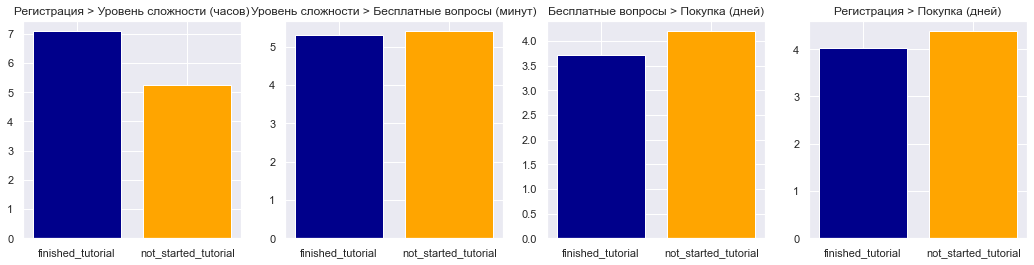

In [27]:
fig, axes = plt.subplots(1, 4, figsize = (18, 4))
axes[0].bar(x = 'finished_tutorial', height = grouped_pivot_total_events['registration_level_hours'][0], color = 'darkblue')
# axes[0].bar(x = 'not_finished_but_started_tutorial', height = grouped_pivot_total_events['registration_level_hours'][1])
axes[0].bar(x = 'not_started_tutorial', height = grouped_pivot_total_events['registration_level_hours'][2], color = 'orange')
axes[0].set_title('Регистрация > Уровень сложности (часов)')

axes[1].bar(x = 'finished_tutorial', height = grouped_pivot_total_events['level_pack_minutes'][0], color = 'darkblue')
# axes[1].bar(x = 'not_finished_but_started_tutorial', height = grouped_pivot_total_events['level_pack_minutes'][1])
axes[1].bar(x = 'not_started_tutorial', height = grouped_pivot_total_events['level_pack_minutes'][2], color = 'orange')
axes[1].set_title('Уровень сложности > Бесплатные вопросы (минут)')

axes[2].bar(x = 'finished_tutorial', height = grouped_pivot_total_events['pack_purchase_days'][0], color = 'darkblue')
# axes[0].bar(x = 'not_finished_but_started_tutorial', height = grouped_pivot_total_events['pack_purchase_days'][1])
axes[2].bar(x = 'not_started_tutorial', height = grouped_pivot_total_events['pack_purchase_days'][2], color = 'orange')
axes[2].set_title('Бесплатные вопросы > Покупка (дней)')

axes[3].bar(x = 'finished_tutorial', height = grouped_pivot_total_events['registration_purchase_days'][0], color = 'darkblue')
# axes[0].bar(x = 'not_finished_but_started_tutorial', height = grouped_pivot_total_events['registration_purchase_days'][1])
axes[3].bar(x = 'not_started_tutorial', height = grouped_pivot_total_events['registration_purchase_days'][2], color = 'orange')
axes[3].set_title('Регистрация > Покупка (дней)')

На графиках выше, мы видим как отличается время прохождения различных этапов для пользователей, которые прошли обучение (finished_tutorial), от пользователей, не начинавших обучение (not_started_tutorial): 

- при переходе от этапа регистрации до выбора уровня сложности, среднее время прохождения у группы пользователей, прошедших обучение - 7.09 часов немного больше, чем у группы пользователей, не проходивших обучение - 5.26 часов.
- при переходе от этапа выбора уровня сложности до выбора бесплатных вопросов, среднее время прохождения в двух рассматриваемых группах практически одинаковое: у пользователей, которые прошли обучение - 5.30 минут и у пользователей, не начинавших обучение - 5.40 минут. 
- при переходе от этапа выбора пакета бесплатных вопросов до покупки платных вопросов, среднее время прохождения у группы пользователей, которые прошли обучение составляет 3.72 дней - немного меньше, чем у группы пользователей, не начинавших обучение - 4.20 дня. 
- при прохождении этапов от регистрации до покупки платных вопросов, среднее время прохождения у группы пользователей, которые прошли обучение составляет 4.02 дня - также немного меньше, чем у группы пользователей, не начинавших обучение - 4.38 дня.  

# 1.4 - Вывод 1:
##### Таким образом, можно сделать вывод, что обучение никак не влияет на время прохождения этапов и соответственно не сокращает время их прохождения. 

# Задача 2:
### Теперь проверим существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь и в случае необходимости докажем, что успешное обучение само по себе влияет на оплату, вне зависимости от того каким этапом оно шло.

# 2.1 
##### Для лучшего понимания зависимости между вероятностью оплаты и количеством обучений, определим конверсию на каждом из этапов воронки, от регистрации до оплаты
# 2.2
##### сгруппируем отдельно пользователей, которые начали обучение и тех, кто завершил обучение по количеству обучений и применим lambda-функцию
# 2.3
##### Объединим датафреймы с помощью функции merge() по параметру user_id, с использованием параметра how='inner', что позволит в объединённом датафрейме оставить только такие идентификаторы пользователей, которые есть в обоих датафреймах
# 2.4 
##### создадим новые переменные, в которых отдельно сгруппируем наших пользователей по количеству начатых обучений и покупок вопросов, а также завершённых обучений и покупок вопросов, выведем полученные результаты
# 2.5
##### посчитаем вероятность оплаты и выведем зависимость между вероятностью оплаты вопросов и количеством обучений
# 2.6 - Вывод 2


# 2.1

In [28]:
# Для этого создадим переменные с количеством уникальных пользователей на каждом этапе:
registered_users = total_events[total_events['event_type'] == 'registration']['user_id'].nunique()           # 1
started_tutorial_users = total_events[total_events['event_type'] == 'tutorial_start']['user_id'].nunique()   # 2
not_started_tutorial_users = registered_users - started_tutorial_users                                       # 3 = #1 - #2
finished_tutorial_users = total_events[total_events['event_type'] == 'tutorial_finish']['user_id'].nunique() # 4
not_finished_tutorial_users = started_tutorial_users - finished_tutorial_users                               # 5 = #2 - #4
level_choice_users = total_events[total_events['event_type'] == 'level_choice']['user_id'].nunique()         # 6
pack_choice_users = total_events[total_events['event_type'] == 'pack_choice']['user_id'].nunique()           # 7
purchase_users = total_events[total_events['event_type'] == 'purchase']['user_id'].nunique()                 # 8

print('Общее количество зарегистрировавшихся в 2018 г.: {}'.format(registered_users))
print('Количество пользователей, которые начали обучение: {}'.format(started_tutorial_users))
print('Количество пользователей, не начинавших обучение: {}'.format(not_started_tutorial_users))
print('Количество пользователей, закончивших своё обучение: {}'.format(finished_tutorial_users))
print('Количество пользователей, не завершивших обучение: {}'.format(not_finished_tutorial_users))
print('Количество пользователей, которые выбрали уровень сложности (level): {}'.format(level_choice_users))
print('Количество пользователей, которые выбрали бесплатные вопросы (pack): {}'.format(pack_choice_users))
print('Количество пользователей, которые оплатили платные вопросы (purchase): {}'.format(purchase_users))
print()

# Посмотрим конверсию на каждом из этапов воронки:
percent_started_tutorial_to_registered = started_tutorial_users / registered_users                           # 2/1
percent_not_started_tutorial_to_registered = not_started_tutorial_users / registered_users                   # 3/1
percent_tutorial_completion = finished_tutorial_users / started_tutorial_users                               # 4/2
percent_finished_tutorial_to_registered = finished_tutorial_users / registered_users                         # 4/1
percent_not_finished_to_started_tutorial = not_finished_tutorial_users / started_tutorial_users              # 5/2
percent_level_choice_to_registered = level_choice_users / registered_users                                   # 6/1
percent_pack_to_level_choice = pack_choice_users / level_choice_users                                        # 7/6
percent_pack_choice_to_registered = pack_choice_users / registered_users                                     # 7/1

print('Процент пользователей, начавших обучение от зарегистрировавшихся: {:.2%}'.format(percent_started_tutorial_to_registered))
print('Процент пользователей, не начавших обучение от зарегистрир-шихся: {:.2%}'.format(percent_not_started_tutorial_to_registered))
print('Процент пользователей, закончивших обучение от начавших обучение: {:.2%}'.format(percent_tutorial_completion))
print('Процент пользователей, закончивших обучение от зарегистрир-шихся: {:.2%}'.format(percent_finished_tutorial_to_registered)) 
print('Процент пользователей, не закончивших обучение от начавших обучение: {:.2%}'.format(percent_not_finished_to_started_tutorial))
print('Процент пользователей, выбравших уровень сложности от зарегистрировавшихся.: {:.2%}'.format(percent_level_choice_to_registered))
print('Процент пользователей, выбравших бесплатные вопросы от выбр. уров. сложности: {:.2%}'.format(percent_pack_to_level_choice))
print('Процент пользователей, выбравших бесплатные вопросы от зарегистрировавшихся: {:.2%}'.format(percent_pack_choice_to_registered))
print()

# Отдельно выделим соотношение этапа оплаты платных вопросов к этапам, связанным с обучением:
percent_purchase_to_started_tutorial = purchase_users / started_tutorial_users                               # 8/2
percent_purchase_to_not_started_tutorial = purchase_users / not_started_tutorial_users                       # 8/3
percent_purchase_to_finished_tutorial = purchase_users / finished_tutorial_users                             # 8/4
percent_purchase_to_not_finished_tutorial = purchase_users / not_finished_tutorial_users                     # 8/5

percent_purchase_to_level_choice = purchase_users / level_choice_users                                       # 8/6
percent_purchase_to_pack_choice = purchase_users / pack_choice_users                                         # 8/7
percent_purchase_to_registered = purchase_users / registered_users                                           # 8/1

print('Процент пользователей, которые оплатили платные вопросы от начинавших обучение: {:.2%}'.format(percent_purchase_to_started_tutorial))
print('Процент пользователей, которые оплатили платные вопросы от не начинавших обучение: {:.2%}'.format(percent_purchase_to_not_started_tutorial))
print('Процент пользователей, которые оплатили платные вопросы от закончивших обучение: {:.2%}'.format(percent_purchase_to_finished_tutorial))
print('Процент пользователей, оплативших платные вопросы от не закончивших обучение: {:.2%}'.format(percent_purchase_to_not_finished_tutorial))
print()
print('Процент пользователей, оплативших платные вопросы от выбравших уровень сложности: {:.2%}'.format(percent_purchase_to_level_choice))
print('Процент пользователей, оплативших платные вопросы от выбравших бесплатные вопросы: {:.2%}'.format(percent_purchase_to_pack_choice))
print('Процент пользователей, которые оплатили платные вопросы от зарегистрировавшихся:    {:.2%}'.format(percent_purchase_to_registered))

Общее количество зарегистрировавшихся в 2018 г.: 19926
Количество пользователей, которые начали обучение: 11858
Количество пользователей, не начинавших обучение: 8068
Количество пользователей, закончивших своё обучение: 10250
Количество пользователей, не завершивших обучение: 1608
Количество пользователей, которые выбрали уровень сложности (level): 8342
Количество пользователей, которые выбрали бесплатные вопросы (pack): 5737
Количество пользователей, которые оплатили платные вопросы (purchase): 1600

Процент пользователей, начавших обучение от зарегистрировавшихся: 59.51%
Процент пользователей, не начавших обучение от зарегистрир-шихся: 40.49%
Процент пользователей, закончивших обучение от начавших обучение: 86.44%
Процент пользователей, закончивших обучение от зарегистрир-шихся: 51.44%
Процент пользователей, не закончивших обучение от начавших обучение: 13.56%
Процент пользователей, выбравших уровень сложности от зарегистрировавшихся.: 41.86%
Процент пользователей, выбравших бесплатн

# 2.2
##### Теперь, сгруппируем отдельно пользователей, которые начали обучение и тех, кто завершил обучение по количеству обучений и применяем lambda-функцию, которая возвращает строки:

In [29]:
# подсчитаем количество начатых обучений, сгруппированных по 'user_id':
started_tutorial_users_grouped = total_events.groupby(['user_id'])['event_type'].apply(lambda x: (x == 'tutorial_start').sum()).\
                                reset_index().rename(columns = {'event_type': 'started_tutorial_count'})
display(started_tutorial_users_grouped)

# подсчитаем количество завершённых обучений, сгруппированных по 'user_id':
finished_tutorial_users_grouped = total_events.groupby(['user_id'])['event_type'].apply(lambda x: (x == 'tutorial_finish').sum()).\
                                reset_index().rename(columns = {'event_type': 'finished_tutorial_count'})
display(finished_tutorial_users_grouped)

# подсчитаем количество покупок платных вопросов, сгруппированных по 'user_id':
purchase_users_grouped = total_events.groupby(['user_id'])['event_type'].apply(lambda x: (x == 'purchase').sum()).\
                                reset_index().rename(columns = {'event_type': 'purchase_count'})
display(purchase_users_grouped)

,user_id,started_tutorial_count
0,27832,0
1,27833,1
2,27834,1
3,27835,1
4,27836,2
...,...,...
19921,47753,1
19922,47754,0
19923,47755,1
19924,47756,1


,user_id,finished_tutorial_count
0,27832,0
1,27833,1
2,27834,1
3,27835,1
4,27836,1
...,...,...
19921,47753,1
19922,47754,0
19923,47755,1
19924,47756,1


,user_id,purchase_count
0,27832,0
1,27833,0
2,27834,0
3,27835,0
4,27836,0
...,...,...
19921,47753,0
19922,47754,0
19923,47755,0
19924,47756,0


# 2.3
##### Объединим датафреймы с помощью функции merge() ...

In [30]:
merged_started_tutorial_purchase = started_tutorial_users_grouped.merge(purchase_users_grouped, how = 'inner', on = 'user_id')
merged_finished_tutorial_purchase = finished_tutorial_users_grouped.merge(purchase_users_grouped, how = 'inner', on = 'user_id')

display(merged_started_tutorial_purchase)
display(merged_finished_tutorial_purchase)

,user_id,started_tutorial_count,purchase_count
0,27832,0,0
1,27833,1,0
2,27834,1,0
3,27835,1,0
4,27836,2,0
...,...,...,...
19921,47753,1,0
19922,47754,0,0
19923,47755,1,0
19924,47756,1,0


,user_id,finished_tutorial_count,purchase_count
0,27832,0,0
1,27833,1,0
2,27834,1,0
3,27835,1,0
4,27836,1,0
...,...,...,...
19921,47753,1,0
19922,47754,0,0
19923,47755,1,0
19924,47756,1,0


# 2.4
##### сгруппируем наших пользователей по количеству начатых и количеству завершённых обучений и выведем соответствующее количество покупок вопросов для каждой группы:

In [31]:
# пользователи сгруппированы по количеству начатых обучений и количеству покупок вопросов:
started_tutorials_purchases = merged_started_tutorial_purchase.groupby(['started_tutorial_count']).\
                            agg({'user_id': 'count', 'purchase_count': 'sum'}).reset_index()
display(started_tutorials_purchases)

# пользователи сгруппированы по количеству завершённых обучений и количеству покупок вопросов:
finished_tutorials_purchases = merged_finished_tutorial_purchase.groupby(['finished_tutorial_count']).\
                            agg({'user_id': 'count', 'purchase_count': 'sum'}).reset_index()
display(finished_tutorials_purchases)

,started_tutorial_count,user_id,purchase_count
0,0,8068,22
1,1,9103,1207
2,2,1589,218
3,3,427,51
4,4,221,30
5,5,109,16
6,6,116,14
7,7,94,12
8,8,86,13
9,9,113,17


,finished_tutorial_count,user_id,purchase_count
0,0,9676,153
1,1,8015,1143
2,2,1321,182
3,3,345,44
4,4,178,19
5,5,117,19
6,6,101,15
7,7,97,15
8,8,54,6
9,9,22,4


# 2.5

In [32]:
# посчитаем вероятность оплаты вопросов для каждой группы:

percent_started_tutorials_to_purchases = started_tutorials_purchases['purchase_count']/started_tutorials_purchases['user_id']
display(percent_started_tutorials_to_purchases)
display(percent_started_tutorials_to_purchases.mean())

percent_finished_tutorials_to_purchases = finished_tutorials_purchases['purchase_count']/finished_tutorials_purchases['user_id']
display(percent_finished_tutorials_to_purchases)
display(percent_finished_tutorials_to_purchases.mean())

0    0.002727
1    0.132594
2    0.137193
3    0.119438
4    0.135747
5    0.146789
6    0.120690
7    0.127660
8    0.151163
9    0.150442
dtype: float64

0.12244417102151765

0    0.015812
1    0.142608
2    0.137774
3    0.127536
4    0.106742
5    0.162393
6    0.148515
7    0.154639
8    0.111111
9    0.181818
dtype: float64

0.12889486301763636

Text(0, 0.5, 'Вероятность оплаты, в %')

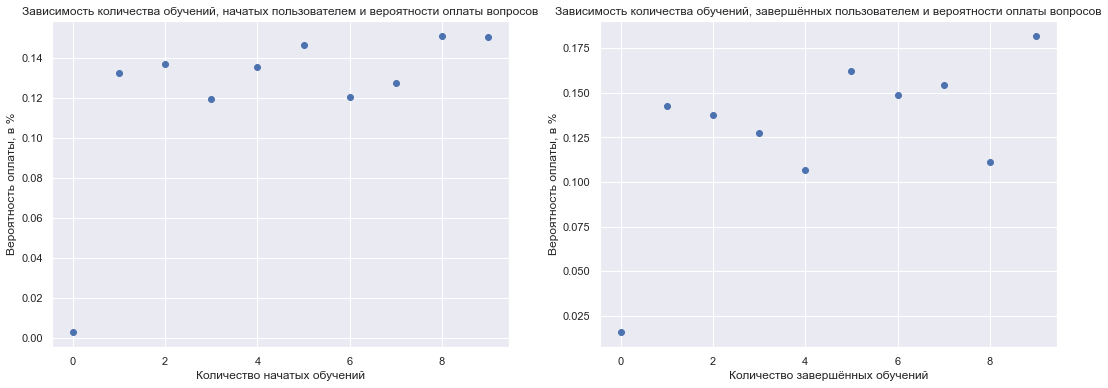

In [33]:
# выведем зависимость между вероятностью оплаты вопросов и количеством обучений:

fig, axes = plt.subplots(1, 2, figsize = (18, 6)) 
axes[0].scatter(x = started_tutorials_purchases['started_tutorial_count'], y = percent_started_tutorials_to_purchases, marker = 'o')
axes[0].set_title('Зависимость количества обучений, начатых пользователем и вероятности оплаты вопросов')
axes[0].set_xlabel('Количество начатых обучений')
axes[0].set_ylabel('Вероятность оплаты, в %')

axes[1].scatter(x = finished_tutorials_purchases['finished_tutorial_count'], y = percent_finished_tutorials_to_purchases, marker = 'o')
axes[1].set_title('Зависимость количества обучений, завершённых пользователем и вероятности оплаты вопросов')
axes[1].set_xlabel('Количество завершённых обучений')
axes[1].set_ylabel('Вероятность оплаты, в %')

# 2.6 - Вывод 2:
##### На графиках выше отображается существующая зависимость между вероятностью оплаты вопросов и соответствующим количеством обучений для данного пользователя, который либо завершил, либо не начинал своё обучение. Если сделать допущение о наличии выбросов в обоих группах, то можно сказать, что у пользователей наблюдается определённая, но не сильная связь между количеством начатых обучений и вероятностью оплаты: 

##### в большей степени это прослеживается у пользователей, которые начали обучение: при количестве начатых обучений - 1, 2, 5, 8 вероятность оплаты составляет ~13.26%, 13.72%, 14.68%, 15.12% соответственно; 

##### у пользователей, которые завершили обучение: при количестве завершенных обучений -  4, 6, 7, 9 вероятность оплаты составляет ~10.67%, 14.85%, 15.46%, 18.18% соответственно. Однако у пользователей, завершивших обучение на определённых промежутках обучений наблюдается обратная зависимость между количеством завершённых обучений и вероятностью оплаты: например, с увеличением завершённых обучений (с 1 до 4 включительно, а также с 5 до 8, за исключением 7) вероятность оплаты снижается:
- 1    0.142608
- 2    0.137774
- 3    0.127536
- 4    0.106742

- 5    0.162393
- 6    0.148515
- 8    0.111111

# Дополнительная задача 3:
##### Проверим как часто пользователи начинают обучение после того, как они выбрали уровень сложности - это позволит нам понять, насколько прозрачен процесс взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.

# 3.1
1. Выделим 2 отдельных датафрейма пользователей, начинавших обучение и выбиравших уровень сложности
2. Объединим данные двух датафреймов с помощью функции merge(), по параметру user_id
3. Рассчитаем положительную разницу во времени между выбором уровня сложности и повторным началом обучения, благодаря чему определим пользователей, которые начинали обучение после выбора уровня сложности.

# 3.2
1. Проверим существует ли зависимость между числом обучений, начатых после выбора уровня сложности и количеством соответствующих пользователей
2. Отобразим полученные результаты в виде графика с использованием метода 
##### 'scatter'
3. 
### предварительный вывод 1

# 3.3
1. Создадим 2 отдельных датафрейма c пользователями, которые начинали обучение после выбора уровня сложности и которые ни разу не начинали обучение после выбора уровня сложности
2. Рассмотрим полученные датафреймы пользователей, которые начинали и не начинали свои обучения после выбора уровня сложности в объединённом и раздельном виде и проанализируем количество пользователей по числу соответствующих обучений
3. Выразим количество пользователей с числом соответствующих обучений в процентном соотношении от общего количества пользователей в каждом датафрейме
4. Отобразим графически данные объединённых и раздельных датафреймов с помощью метода 
##### subplots и функции pie()
5. 
### предварительный вывод 2
6. Отобразим графически данные раздельного датафрейма с помощью метода
##### iplot()
7. 
### предварительный вывод 3
8. Отобразим графически данные объединённого датафрейма с помощью метода iplot()
9. 
### предварительный вывод 4
 
# 3.4 - Вывод 3

### 3.5 - Дополнительный анализ уникальных пользовательских путей пользователей, которые начали обучение после выбора уровня сложности (смотреть не обязательно)
для каждого пользователя создадим список, который будет содержать во временной последовательности все события, совершаемые данным пользователем: воспользуемся методом groupby (по столбцу event_type) и применим аргегирующую функцию apply(list). 
Таким образом, мы сгруппируем строки по пользователю, а затем объединим в списки содержимое столбца event_type по каждому пользователю. Запишем результат в датафрейм 
##### user_path
, где для каждого пользователя в столбце event_type будут указаны последовательно все его события — пути пользователя.
- преобразуем список событий в строку 
##### event_path 
для оптимизации скорости объединения, сгруппируем датафрейм по столбцу event_path, подсчитав число пользователей и выведем все последовательности рассматриваемых событий
##### users_paths > users_paths2

# 3.1

In [34]:
# 1. Выделим отдельные датафреймы для пользователей, которые начинали обучение и выбирали уровень сложности:
# переименуем колонку event_time каждого датафрейма в tutorial_start_time и level_choice_time, соответственно:

tutorial_start2018 = total_events[total_events['event_type'] == 'tutorial_start'][['event_time', 'user_id']].\
                    rename(columns = {'event_time': 'tutorial_start_time'})
display(tutorial_start2018.head())

level_choice2018 = total_events[total_events['event_type'] == 'level_choice'][['event_time', 'user_id']].\
                    rename(columns = {'event_time': 'level_choice_time'})
display(level_choice2018.head())

,tutorial_start_time,user_id
51412,2018-01-01 14:54:40,27836
51413,2018-01-01 15:00:51,27835
51415,2018-01-01 15:40:43,27836
51417,2018-01-01 17:47:40,27833
51420,2018-01-01 19:11:36,27839


,level_choice_time,user_id
51424,2018-01-01 20:37:22,27835
51428,2018-01-01 22:37:50,27839
51441,2018-01-02 05:18:42,27840
51443,2018-01-02 06:19:18,27845
51450,2018-01-02 08:46:03,27842


In [35]:
# 2. Объединим данные двух датафреймов с помощью функции merge(), по параметру user_id 
# - оставим только такие идентификаторы пользователей, которые есть в обоих датафреймах:

merged_level_tutorial_start = tutorial_start2018.merge(level_choice2018, on = 'user_id', how = 'inner')
merged_level_tutorial_start

,tutorial_start_time,user_id,level_choice_time
0,2018-01-01 15:00:51,27835,2018-01-01 20:37:22
1,2018-01-01 19:11:36,27839,2018-01-01 22:37:50
2,2018-01-02 02:07:07,27840,2018-01-02 05:18:42
3,2018-01-02 03:03:44,27845,2018-01-02 06:19:18
4,2018-01-02 07:08:00,27845,2018-01-02 06:19:18
...,...,...,...
12681,2018-12-31 07:14:38,47732,2018-12-31 09:59:00
12682,2018-12-31 10:21:11,47747,2018-12-31 12:24:40
12683,2018-12-31 20:54:56,47753,2018-12-31 22:36:19
12684,2019-01-01 00:08:14,47755,2019-01-01 05:04:52


In [36]:
# 3. Посчитаем разницу между временем начала обучения tutorial_start_time и временем выбора уровня сложности level_choice_time, 
# из которых оставим только положительные значения, отражающие пользователей начинавших обучение после выбора уровня сложности:

merged_level_tutorial_start['time_delta'] = merged_level_tutorial_start['tutorial_start_time'] - merged_level_tutorial_start['level_choice_time']
users_started_tutorial_after_level = merged_level_tutorial_start[merged_level_tutorial_start.time_delta > pd.Timedelta(0)].reset_index(drop = True)
users_started_tutorial_after_level

,tutorial_start_time,user_id,level_choice_time,time_delta
0,2018-01-02 07:08:00,27845,2018-01-02 06:19:18,0 days 00:48:42
1,2018-01-02 09:01:51,27842,2018-01-02 08:46:03,0 days 00:15:48
2,2018-01-02 18:08:01,27842,2018-01-02 08:46:03,0 days 09:21:58
3,2018-01-02 20:34:31,27852,2018-01-02 18:39:44,0 days 01:54:47
4,2018-01-03 11:17:41,27862,2018-01-03 04:19:32,0 days 06:58:09
...,...,...,...,...
2787,2018-12-28 17:28:42,47635,2018-12-28 11:43:38,0 days 05:45:04
2788,2018-12-28 21:44:13,47657,2018-12-28 21:25:49,0 days 00:18:24
2789,2018-12-28 21:53:06,47657,2018-12-28 21:25:49,0 days 00:27:17
2790,2018-12-29 22:50:57,47711,2018-12-29 21:23:23,0 days 01:27:34


# 3.2

In [37]:
# 1. Подсчитаем уникальное количество пользователей, которое приходится на определённое число (повторных) обучений, 
# начатых после выбора уровня сложности:

tutorial_started_after_level = users_started_tutorial_after_level.user_id.value_counts().reset_index().rename(columns = {'user_id': 'tutorial_started_after_level_choice'})
users_per_tutorial_started_after_level = tutorial_started_after_level.groupby(['tutorial_started_after_level_choice']).count()
users_per_tutorial_started_after_level = users_per_tutorial_started_after_level.rename(columns = {'index': 'users_quantity'})
users_per_tutorial_started_after_level.reset_index(inplace = True)
display(users_per_tutorial_started_after_level)
display(users_per_tutorial_started_after_level['users_quantity'].sum())

,tutorial_started_after_level_choice,users_quantity
0,1,819
1,2,229
2,3,116
3,4,77
4,5,57
5,6,51
6,7,28
7,8,9


1386

Text(0, 0.5, 'Количество пользователей')

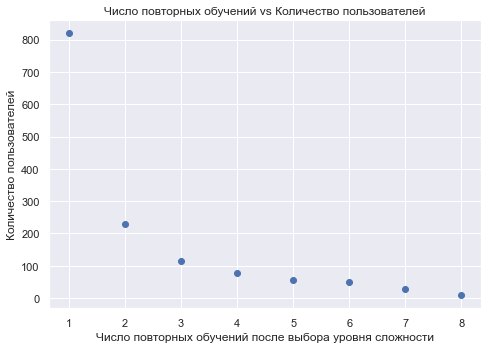

In [38]:
# 2. Отобразим зависимость количества пользователей от числа повторно начинаемых обучений после выбора уровня сложности:
## используем метод 'scatter'

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x = users_per_tutorial_started_after_level['tutorial_started_after_level_choice'], y = users_per_tutorial_started_after_level['users_quantity'], marker = 'o')
axes.set_title('Число повторных обучений vs Количество пользователей')
axes.set_xlabel('Число повторных обучений после выбора уровня сложности')
axes.set_ylabel('Количество пользователей')

3. 
На графике выше, мы наблюдаем обратную зависимость количества пользователей от числа повторно начинаемых обучений после выбора уровня сложности. Можно сделать 
### предварительный вывод 1:
- положительным моментом является то, что по мере обращения к обучению после выбора уровня сложности количество таких пользователей линейно снижается, т.е. с каждым новым обучением процесс взаимодействия с игрой становится всё более прозрачным.
- отрицательным моментом является то, что в процессе взаимодействия с игрой явно присутствует фактор "недопонимания" работы с приложением, о чём нам говорит наличие повторных обучений.

# 3.3

In [39]:
# 1.
# Пользователи, которые начинали обучение после выбора уровня сложности:

users_with_tutorials_after_level = users_started_tutorial_after_level[['user_id', 'tutorial_start_time']].groupby(['user_id']).count()
unique_users_with_tutorials_after_level = users_with_tutorials_after_level.index.unique()
display(users_with_tutorials_after_level)


# Теперь, добавим в наш датафрейм пользователей, которые ни разу не начинали обучение после выбора уровня сложности:
## уберём из множества всех уникальных пользователей когда-либо начинавших обучение (См. 1.1 > set_users_with_started_tutorial)
## всех пользователей, начинавших обучение после выбора уровня сложности (unique_users_with_tutorials_after_level)

level_choice_users = total_events[total_events['event_type'] == 'level_choice']['user_id'].unique()
#set_users_with_started_tutorial = set(total_events[total_events['event_type'] == 'tutorial_start']['user_id'].unique())
set_users_wo_tut_after_lev = (set(level_choice_users) - set(unique_users_with_tutorials_after_level))
users_wo_tutorials_after_level = pd.DataFrame(set_users_wo_tut_after_lev, columns = ['user_id'])
users_wo_tutorials_after_level['tutorial_start_time'] = 0
display(users_wo_tutorials_after_level)

,tutorial_start_time
user_id,
27842,2
27845,1
27852,1
27862,4
27876,1
...,...
47595,1
47635,1
47657,2


,user_id,tutorial_start_time
0,32773,0
1,32775,0
2,32778,0
3,32779,0
4,32784,0
...,...,...
6951,32755,0
6952,32759,0
6953,32763,0
6954,32764,0


In [40]:
# 2. Рассмотрим раздельно и вместе пользователей, которые начинали и не начинали свои обучения после выбора уровня сложности:
#    проанализируем количество пользователей по числу соответствующих обучений:

## Рассмотрим раздельно пользователей, которые начинали свои обучения после выбора уровня сложности:

started_tutorials_after_level = users_with_tutorials_after_level.rename(columns = {'tutorial_start_time': 'Количество начатых обучений'})
started_tutorials_after_level['user_id'] = started_tutorials_after_level.index
started_tutorials_after_level_users = started_tutorials_after_level.groupby(['Количество начатых обучений']).count().rename(columns = {'user_id': 'Количество пользователей'}).reset_index()
display(started_tutorials_after_level_users)
print('Всего пользователей, которые начинали\nобучение после выбора уровня сложности:       {:}'.format(started_tutorials_after_level_users['Количество пользователей'].sum()))

## Объединим полученные датафреймы и определим пользователей, которые начинали и не начинали свои обучения после выбора
##  уровня сложности:

all_tutorials_after_level = pd.concat([users_with_tutorials_after_level, users_wo_tutorials_after_level]).rename(columns = {'tutorial_start_time': 'Количество начатых обучений'})
all_tutorials_after_level['user_id'] = all_tutorials_after_level.index
all_tutorials_after_level_users = all_tutorials_after_level.groupby(['Количество начатых обучений']).count().rename(columns = {'user_id': 'Количество пользователей'}).reset_index()
display(all_tutorials_after_level_users)
print('Всего пользователей, которые начинали и не\nначинали обучение после выб. уров. сложности: {:}'.format(all_tutorials_after_level_users['Количество пользователей'].sum()))

,Количество начатых обучений,Количество пользователей
0,1,819
1,2,229
2,3,116
3,4,77
4,5,57
5,6,51
6,7,28
7,8,9


Всего пользователей, которые начинали
обучение после выбора уровня сложности:       1386


,Количество начатых обучений,Количество пользователей
0,0,6956
1,1,819
2,2,229
3,3,116
4,4,77
5,5,57
6,6,51
7,7,28
8,8,9


Всего пользователей, которые начинали и не
начинали обучение после выб. уров. сложности: 8342


In [41]:
# 3. Выразим количество пользователей с числом соответствующих обучений в процентном соотношении от общего количества 
#    пользователей в каждом датафрейме, добавим колонку ['Процент пользователей']:

started_tutorials_after_level_users['Процент пользователей'] = started_tutorials_after_level_users['Количество пользователей']/\
                                                started_tutorials_after_level_users['Количество пользователей'].sum()
display(started_tutorials_after_level_users)
print('Всего пользователей, которые начинали\nобучение после выбора уровня сложности:       {:}'.format(started_tutorials_after_level_users['Количество пользователей'].sum()))

all_tutorials_after_level_users['Процент пользователей'] = all_tutorials_after_level_users['Количество пользователей']/\
                                                all_tutorials_after_level_users['Количество пользователей'].sum()
display(all_tutorials_after_level_users)
print('Всего пользователей, которые начинали и не\nначинали обучение после выб. уров. сложности: {:}'.format(all_tutorials_after_level_users['Количество пользователей'].sum()))

,Количество начатых обучений,Количество пользователей,Процент пользователей
0,1,819,0.590909
1,2,229,0.165224
2,3,116,0.083694
3,4,77,0.055556
4,5,57,0.041126
5,6,51,0.036797
6,7,28,0.020202
7,8,9,0.006494


Всего пользователей, которые начинали
обучение после выбора уровня сложности:       1386


,Количество начатых обучений,Количество пользователей,Процент пользователей
0,0,6956,0.833853
1,1,819,0.098178
2,2,229,0.027451
3,3,116,0.013906
4,4,77,0.009230
5,5,57,0.006833
6,6,51,0.006114
7,7,28,0.003357
8,8,9,0.001079


Всего пользователей, которые начинали и не
начинали обучение после выб. уров. сложности: 8342


Text(0.5, 1.0, 'Процентное соотношение пользователей, начинавших обучение n-раз после выбора уровня сложности, где n - это количество начатых обучений')

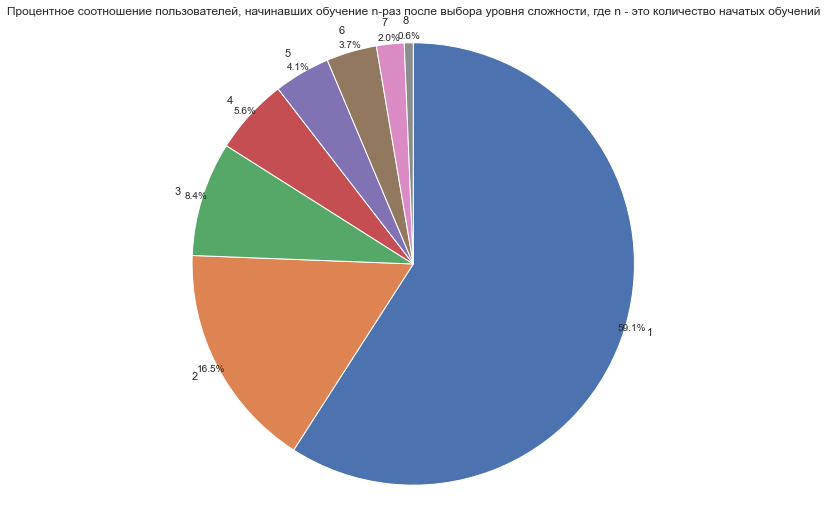

In [42]:
# 4. Отобразим данные из полученных датафреймов в виде графика с помощью метода subplots > pie():

fig2, axes2 = plt.subplots(figsize = (10, 9))
axes2.pie(started_tutorials_after_level_users['Количество пользователей'], labels = started_tutorials_after_level_users['Количество начатых обучений'],\
         explode = None, shadow = False, autopct = '%1.1f%%', radius = 1, pctdistance = 1.03, counterclock = False,\
         startangle = 90)
axes2.axis('equal')
axes2.set_title('Процентное соотношение пользователей, начинавших обучение n-раз после выбора уровня сложности, где n - это количество начатых обучений')

5. 
### Предварительный вывод 2:
График выше отображает процентное соотношение количества пользователей сгруппированных по числу начатых обучений к общему количеству пользователей, которые начинали обучение после выбора уровня сложности: данное распределение пользователей с повторными обучениями визуально подкрепляет наш "предварительный вывод 1" о наличии в работе с приложением фактора "недопонимания", о чём свидетельствуют повторные обучения: пользователи, которые повторно начинают обучение 2-8 раз составляют 40.9% (3-8 раз - почти 25%) от всех пользователей в данной выборке.

In [43]:
# 6. Отобразим данные раздельного датафрейма с пользователями, начинавшими обучение после выбора уровня сложности (iplot):

started_tutorials_after_level_users.iplot(kind = 'bubble', x = 'Количество начатых обучений', y = 'Количество пользователей', size = 'Процент пользователей', color = 'darkred')

7. 
### Предварительный вывод 3:
На графике выше мы дополнительно видим, что большинство - 819 (59%) из рассматриваемых 1386 пользователей, которые начали первое обучение после выбора уровня сложности проходят обучение один раз, после чего большинство пользователей предположительно осваивают процесс взаимодействия с игрой, т.к. количество пользователей с повторными обучениями заметно снижается. Однако, совокупное количество пользователей с повторными обучениями (2-8) составляет 567 человек (41%), что может говорит нам о необходимости оптимизировать работу пользователя с приложением.

In [44]:
# 8. 

color_t = ['darkgreen', 'darkred', 'darkred', 'darkred', 'darkred', 'darkred', 'darkred', 'darkred', 'darkred']
all_tutorials_after_level_users.iplot(kind = 'bubble', x = 'Количество начатых обучений', y = 'Количество пользователей', size = 'Процент пользователей', color = color_t)

9. 
### Предварительный вывод 4:

На графике выше мы можем визуально сравнить количество пользователей, которые не начинали обучение после выбора уровня сложности - 6956 (зелёный шар) с количеством пользователей, сгруппированных по числу начатых обучений после выбора уровня сложности - 1386 (совокупность всех красных шаров) от общего количества пользователей, которые выбрали уровень сложности (8342). 


Если подытожить все предварительные выводы по дополнительной задаче, то можно сделать следующий вывод: 

# 3.4 - Вывод 3:
С учётом допущения, что повторное обращение пользователей к обучению после выбора уровня сложности свидетельствует о наличии у пользователей вопросов по работе с приложением, то максимальное количество повторных обучений и совокупность пользователей, которые начинали обучение после выбора уровня сложности в 16.61% от общего количества пользователей, выбравших уровень сложности говорит нам о том, что процесс взаимодействия с игрой недостаточно прозрачен и в дальнейшем может быть оптимизирован.

*******************************************************************************************************************************

# 3.5
### Дополнительный анализ (вне задач проекта):

In [114]:
tut_start = total_events[total_events['event_type'] == 'tutorial_start'].rename(columns = {'event_time': 'tutorial_start_time'})
tut_start

,event_id,event_type,selected_level,tutorial_start_time,tutorial_id,user_id,purchase_id,amount
51412,80315.0,tutorial_start,NaN,2018-01-01 14:54:40,31505.0,27836,NaN,NaN
51413,80316.0,tutorial_start,NaN,2018-01-01 15:00:51,31506.0,27835,NaN,NaN
51415,80318.0,tutorial_start,NaN,2018-01-01 15:40:43,31507.0,27836,NaN,NaN
51417,80320.0,tutorial_start,NaN,2018-01-01 17:47:40,31508.0,27833,NaN,NaN
51420,80323.0,tutorial_start,NaN,2018-01-01 19:11:36,31509.0,27839,NaN,NaN
...,...,...,...,...,...,...,...,...
118339,147242.0,tutorial_start,NaN,2018-12-31 10:21:11,49550.0,47747,NaN,NaN
118348,147251.0,tutorial_start,NaN,2018-12-31 19:38:14,49551.0,47751,NaN,NaN
118350,147253.0,tutorial_start,NaN,2018-12-31 20:54:56,49552.0,47753,NaN,NaN
118357,147260.0,tutorial_start,NaN,2019-01-01 00:08:14,49553.0,47755,NaN,NaN


In [115]:
lev_choice = total_events[total_events['event_type'] == 'level_choice'].rename(columns = {'event_time': 'level_choice_time'})
lev_choice

,event_id,event_type,selected_level,level_choice_time,tutorial_id,user_id,purchase_id,amount
51424,80327.0,level_choice,medium,2018-01-01 20:37:22,NaN,27835,NaN,NaN
51428,80331.0,level_choice,hard,2018-01-01 22:37:50,NaN,27839,NaN,NaN
51441,80344.0,level_choice,medium,2018-01-02 05:18:42,NaN,27840,NaN,NaN
51443,80346.0,level_choice,hard,2018-01-02 06:19:18,NaN,27845,NaN,NaN
51450,80353.0,level_choice,easy,2018-01-02 08:46:03,NaN,27842,NaN,NaN
...,...,...,...,...,...,...,...,...
118337,147240.0,level_choice,medium,2018-12-31 09:59:00,NaN,47732,NaN,NaN
118342,147245.0,level_choice,medium,2018-12-31 12:24:40,NaN,47747,NaN,NaN
118353,147256.0,level_choice,medium,2018-12-31 22:36:19,NaN,47753,NaN,NaN
118362,147265.0,level_choice,easy,2019-01-01 05:04:52,NaN,47755,NaN,NaN


In [173]:
merged_lev_tut_start = lev_choice.merge(tut_start, on = 'user_id', how = 'inner')

merged_lev_tut_start['time_delta'] = merged_lev_tut_start['tutorial_start_time'] - merged_lev_tut_start['level_choice_time']
#display(merged_lev_tut_start)

merged_lev_tut_start2 = merged_lev_tut_start[merged_lev_tut_start.time_delta > pd.Timedelta(0)].reset_index(drop = True).\
                        rename(columns = {'event_id_x': 'event_id'})
merged_lev_tut_start2

,event_id,event_type_x,selected_level_x,level_choice_time,tutorial_id_x,user_id,purchase_id_x,amount_x,event_id_y,event_type_y,selected_level_y,tutorial_start_time,tutorial_id_y,purchase_id_y,amount_y,time_delta
0,80346.0,level_choice,hard,2018-01-02 06:19:18,NaN,27845,NaN,NaN,80349.0,tutorial_start,NaN,2018-01-02 07:08:00,31514.0,NaN,NaN,0 days 00:48:42
1,80353.0,level_choice,easy,2018-01-02 08:46:03,NaN,27842,NaN,NaN,80354.0,tutorial_start,NaN,2018-01-02 09:01:51,31516.0,NaN,NaN,0 days 00:15:48
2,80353.0,level_choice,easy,2018-01-02 08:46:03,NaN,27842,NaN,NaN,80375.0,tutorial_start,NaN,2018-01-02 18:08:01,31522.0,NaN,NaN,0 days 09:21:58
3,80378.0,level_choice,medium,2018-01-02 18:39:44,NaN,27852,NaN,NaN,80381.0,tutorial_start,NaN,2018-01-02 20:34:31,31524.0,NaN,NaN,0 days 01:54:47
4,80405.0,level_choice,medium,2018-01-03 04:19:32,NaN,27862,NaN,NaN,80419.0,tutorial_start,NaN,2018-01-03 11:17:41,31533.0,NaN,NaN,0 days 06:58:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2787,146911.0,level_choice,medium,2018-12-28 11:43:38,NaN,47635,NaN,NaN,146957.0,tutorial_start,NaN,2018-12-28 17:28:42,49480.0,NaN,NaN,0 days 05:45:04
2788,146995.0,level_choice,medium,2018-12-28 21:25:49,NaN,47657,NaN,NaN,147000.0,tutorial_start,NaN,2018-12-28 21:44:13,49491.0,NaN,NaN,0 days 00:18:24
2789,146995.0,level_choice,medium,2018-12-28 21:25:49,NaN,47657,NaN,NaN,147002.0,tutorial_start,NaN,2018-12-28 21:53:06,49492.0,NaN,NaN,0 days 00:27:17
2790,147124.0,level_choice,medium,2018-12-29 21:23:23,NaN,47711,NaN,NaN,147130.0,tutorial_start,NaN,2018-12-29 22:50:57,49521.0,NaN,NaN,0 days 01:27:34


In [181]:
users_started_tut_after_lev = merged_lev_tut_start2.groupby(['user_id'])['event_type_x'].apply(list).reset_index()
users_started_tut_after_lev

,user_id,event_type_x
0,27842,"[level_choice, level_choice]"
1,27845,[level_choice]
2,27852,[level_choice]
3,27862,"[level_choice, level_choice, level_choice, lev..."
4,27876,[level_choice]
...,...,...
1381,47595,[level_choice]
1382,47635,[level_choice]
1383,47657,"[level_choice, level_choice]"
1384,47711,[level_choice]


In [182]:
users_started_tut_after_lev2 = merged_lev_tut_start2.groupby(['user_id'])['event_type_y'].apply(list).reset_index()
users_started_tut_after_lev2

,user_id,event_type_y
0,27842,"[tutorial_start, tutorial_start]"
1,27845,[tutorial_start]
2,27852,[tutorial_start]
3,27862,"[tutorial_start, tutorial_start, tutorial_star..."
4,27876,[tutorial_start]
...,...,...
1381,47595,[tutorial_start]
1382,47635,[tutorial_start]
1383,47657,"[tutorial_start, tutorial_start]"
1384,47711,[tutorial_start]


In [189]:
users_started_tut_after_lev['event_path'] = users_started_tut_after_lev['event_type_x'].apply(lambda x: '>'.join(x))
users_started_tut_after_lev['event_path']

0                               level_choice>level_choice
1                                            level_choice
2                                            level_choice
3       level_choice>level_choice>level_choice>level_c...
4                                            level_choice
                              ...                        
1381                                         level_choice
1382                                         level_choice
1383                            level_choice>level_choice
1384                                         level_choice
1385                                         level_choice
Name: event_path, Length: 1386, dtype: object

In [190]:
users_started_tut_after_lev2['event_path'] = users_started_tut_after_lev2['event_type_y'].apply(lambda x: '>'.join(x))
users_started_tut_after_lev2['event_path']

0                           tutorial_start>tutorial_start
1                                          tutorial_start
2                                          tutorial_start
3       tutorial_start>tutorial_start>tutorial_start>t...
4                                          tutorial_start
                              ...                        
1381                                       tutorial_start
1382                                       tutorial_start
1383                        tutorial_start>tutorial_start
1384                                       tutorial_start
1385                                       tutorial_start
Name: event_path, Length: 1386, dtype: object

In [98]:
# посмотрим какое количество пользователей содержат последовательности с событиями level_choice и tutorial_start:

In [193]:
users_paths = users_started_tut_after_lev.groupby(['event_path'])['user_id'].nunique().sort_values(ascending = False)
users_paths[users_paths.index.str.contains('level_choice')]
display(users_paths)

event_path
level_choice                                                                                               819
level_choice>level_choice                                                                                  229
level_choice>level_choice>level_choice                                                                     116
level_choice>level_choice>level_choice>level_choice                                                         77
level_choice>level_choice>level_choice>level_choice>level_choice                                            57
level_choice>level_choice>level_choice>level_choice>level_choice>level_choice                               51
level_choice>level_choice>level_choice>level_choice>level_choice>level_choice>level_choice                  28
level_choice>level_choice>level_choice>level_choice>level_choice>level_choice>level_choice>level_choice      9
Name: user_id, dtype: int64

In [234]:
users_paths2 = users_started_tut_after_lev2.groupby(['event_path'])['user_id'].nunique().sort_values(ascending = False)
users_paths2[users_paths2.index.str.contains('tutorial_start')]

event_path
tutorial_start                                                                                                             819
tutorial_start>tutorial_start                                                                                              229
tutorial_start>tutorial_start>tutorial_start                                                                               116
tutorial_start>tutorial_start>tutorial_start>tutorial_start                                                                 77
tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start                                                  57
tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start                                   51
tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start                    28
tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_s

In [229]:
users_paths2 = users_paths2.to_frame()

In [231]:
users_paths2['tutorial_start_count'] = users_paths2.index.str.count('>') + 1

In [232]:
# Посмотрим на пути пользователей, которые начали обучение после выбора уровня сложности 
# в разрезе количества пользователей и числа начатых обучений после выбора уровня сложности:

users_paths2

,user_id,tutorial_start_count
event_path,,
tutorial_start,819,1
tutorial_start>tutorial_start,229,2
tutorial_start>tutorial_start>tutorial_start,116,3
tutorial_start>tutorial_start>tutorial_start>tutorial_start,77,4
tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start,57,5
tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start,51,6
tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start,28,7
tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start>tutorial_start,9,8
